<a href="https://colab.research.google.com/github/supunlakshan100/DeepLearning-lemonade_sales_prediction/blob/main/Lemonade%20Sales%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Lemonade Sales Prediction *Using Deep Learning*

In [ ]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
torch.__version__

'2.0.1+cu118'

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/LeakyAI/FirstNeuralNet/main/lemons.csv')
df.head(10)

,Weekend,Sunny,Warm,BigSign,Price,NumberSold
0,1,0,0,1,9,71
1,1,1,1,0,10,137
2,0,1,0,0,10,0
3,1,0,0,1,6,107
4,1,0,0,1,8,80
5,1,1,0,0,6,110
6,1,1,1,0,8,167
7,0,0,1,1,8,0
8,1,0,1,0,8,124
9,1,1,0,0,7,95


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
print ('A {} device was detected'.format(device))

if device=='cuda':
    print (torch.cuda.get_device_name(device=device))

A cuda device was detected
Tesla T4


In [ ]:
df.shape

(365, 6)

###Standardization

In [ ]:
#Standardize Price

PriceMean= df['Price'].mean()
priceStd= df['Price'].std()

df['Price']= (df['Price']-PriceMean)/priceStd

In [ ]:
#Standardize numSold

numsoldMean = df['NumberSold'].mean()
numsoldStd = df['NumberSold'].std()

df['NumberSold'] = (df['NumberSold']-numsoldMean)/numsoldStd

In [ ]:
df.head(10)

,Weekend,Sunny,Warm,BigSign,Price,NumberSold
0,1,0,0,1,0.846650,-0.023669
1,1,1,1,0,1.452587,0.743734
2,0,1,0,0,1.452587,-0.849208
3,1,0,0,1,-0.971158,0.394915
4,1,0,0,1,0.240714,0.080977
5,1,1,0,0,-0.971158,0.429797
6,1,1,1,0,0.240714,1.092554
7,0,0,1,1,0.240714,-0.849208
8,1,0,1,0,0.240714,0.592579
9,1,1,0,0,-0.365222,0.255387


### Create Our Input(x) and Output(y) to train our Neural Network

In [ ]:
inputs= ['Weekend',	'Sunny',	'Warm',	'BigSign',	'Price']
x= torch.tensor(df[inputs].values, dtype=torch.float, device=device)

outputs=['NumberSold']
y=torch.tensor(df[outputs].values,dtype=torch.float,device=device)

In [ ]:
type(x)

torch.Tensor

In [ ]:
x.shape

torch.Size([365, 5])

In [ ]:
x[0:5]

tensor([[ 1.0000,  0.0000,  0.0000,  1.0000,  0.8467],
        [ 1.0000,  1.0000,  1.0000,  0.0000,  1.4526],
        [ 0.0000,  1.0000,  0.0000,  0.0000,  1.4526],
        [ 1.0000,  0.0000,  0.0000,  1.0000, -0.9712],
        [ 1.0000,  0.0000,  0.0000,  1.0000,  0.2407]], device='cuda:0')

In [ ]:
y[0:5] #sclicing

tensor([[-0.0237],
        [ 0.7437],
        [-0.8492],
        [ 0.3949],
        [ 0.0810]], device='cuda:0')

### Step - 03 Buid Neural Network

In [ ]:
# Define your pytorch neural network
# Number of Inputs :5
# Number of Hidden Units: 100
# Number of Hidden Layers: 1
# Activation Function: Relu
# Number of Outputs: 1

model = nn.Sequential(
        nn.Linear(5,100),
        nn.ReLU(),
        nn.Linear(100,1)

)

# Move it to either the CPU or GPU depending on what we have available

model.to(device)


Sequential(
  (0): Linear(in_features=5, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

### Step 04- Train Your Neural Network

In [ ]:
import torch.optim as optim

# Define the loss function for our neural network,Measure our neural network by mean square error
criterion = torch.nn.MSELoss()

# Define the optimizer to train our network using stochastic gradient descent (SGD),Train our network with a simple SGD approach
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Train our network using the entire dataset for 5 epochs,Train our network a using the entire dataset 5 times

for epoch in range(5):
    totalLoss = 0
    for i in range(len(x)):

        # Perform a forward pass through the neural network
        y_pred = model(x[i])

        # Calculate the loss by comparing the predicted output to the actual output
        loss = criterion(y_pred, y[i])

        # Keep track of the accumulated loss for this epoch
        totalLoss += loss.item()

        # Update the neural network by backpropagating the gradients and adjusting the weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print the total loss after each training iteration
    print("Total Loss:", totalLoss)

    '''In the updated comments:
The torch.optim module is explicitly imported to clarify the usage of the optimizer.

The loss function is described as measuring how well the neural network performs, specifically using the mean
squared error (MSE) loss.

The optimizer is mentioned as being used to train the network using stochastic gradient descent (SGD) with a learning rate
of 0.01 and momentum of 0.9.

The inner loop, which iterates over the dataset, is clarified as performing a forward pass through the network.

The calculation of the loss and the accumulation of the total loss for each epoch are described.

The comments explain the process of updating the neural network by zeroing gradients, backpropagating the loss, and
stepping the optimizer.

The final comment clarifies that the total loss is printed after each training iteration.

These comments provide a better understanding of the purpose and functionality of each step in the code.'''


Total Loss: 1.246264634384616
Total Loss: 1.1693652159950751
Total Loss: 1.1142375571516228
Total Loss: 1.050221513028177
Total Loss: 1.0032113512584235


## Step 5 - Analyze the Network's Performance

In [ ]:
# Plot predictions vs. true values
@torch.no_grad()
def graphPredictions(model, x, y , minValue, maxValue):

    model.eval()                               # Set the model to inference mode

    predictions=[]                             # Track predictions
    actual=[]                                  # Track the actual labels

    x.to(device)
    y.to(device)
    model.to(device)

    for i in range(len(x)):

        # Single forward pass
        pred = model(x[i])

        # Un-normalize our prediction
        pred = pred*numsoldStd+numsoldMean
        act = y[i]*numsoldStd+numsoldMean

        # Save prediction and actual label
        predictions.append(pred.tolist())
        actual.append(act.item())

    # Plot actuals vs predictions
    plt.scatter(actual, predictions)
    plt.xlabel('Actual Lemonades Sold')
    plt.ylabel('Predicted Lemonades Sold')
    plt.plot([minValue,maxValue], [minValue,maxValue])
    plt.xlim(minValue, maxValue)
    plt.ylim(minValue, maxValue)

    # Make the display equal in both dimensions
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

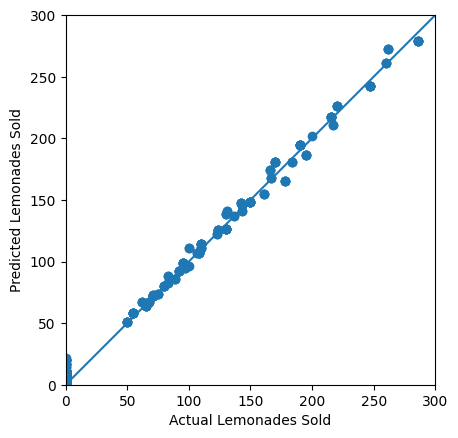

In [ ]:
graphPredictions(model, x,y,0,300)

## Step 6 - Test with Your Own Predictions
Below we makeup some input data and see what our predictions should be vs what the neural network predicted.

In [ ]:
# Below we use the synthetic data generator forumla to
# determine what the actual result should have been.
def datasetGenerator(weekend, sunny, warm, bigsign, price):
    numlemonssold = 0
    if weekend:
        numlemonssold = (sunny*5  + int(500 / price))
        if bigsign:
            numlemonssold = 1.3 * numlemonssold
        if warm:
            numlemonssold = 2 * numlemonssold
        if sunny:
            numlemonssold = 1.25 * numlemonssold
    numlemonssold = int(numlemonssold)
    return numlemonssold

In [ ]:
# Data that affects the number of lemons sold in one day
weekend = 1
sunny = 1
warm = 0
bigsign = 1
price = 5

# Calculate what would have been the actual result using
# the synthetic dataset's algorithm
actual = datasetGenerator(weekend, sunny, warm, bigsign, price)

# Use the CPU as we just need to do a single pass
model.to('cpu')

# Normalize our inputs using the same values for our training
price = (price-PriceMean)/ priceStd

# Create our input tensor
x1 = torch.tensor([weekend, sunny, warm, bigsign, price],dtype=float)

# Pass the input into the neural network
y1 = model(x1.float())

# Un-normalize our output y1
y1 = y1*numsoldStd+numsoldMean

# Compare what your network predicted to the actual
print ("Neural Network Predicts: ", y1.item())
print ("Actual Result: ", actual)

Neural Network Predicts:  138.36764526367188
Actual Result:  130


In [ ]:
!git clone git@github.com:supunlakshan100/DeepLearning-lemonade_sales_prediction.git

Cloning into 'DeepLearning-lemonade_sales_prediction'...
Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.
